# Importing the Necessary Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# For Jupyter Notebooks to show the plots
%matplotlib inline

# Importing the Dataset
## We are working with the *Iris Dataset* here

[*Note: Link to the dataset website*](https://archive.ics.uci.edu/ml/datasets/iris)

In [2]:
PATH_TO_IRIS_DATASET = os.path.join(".", "dataset", "Iris.data")
COLUMN_HEADER_NAMES = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"]

iris_df = pd.read_csv(PATH_TO_IRIS_DATASET, names=COLUMN_HEADER_NAMES, index_col=False)

iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Selecting the Features for Clustering
## Dropping the `Species` Column

Since we are clustering the data, we don't need the labels or classes of the Iris Species.

Hence we'll drop this column and use the **K-Means Clustering Algorithm** to group the data ponts into 3 clusters based on the `Sepal Length` and `Petal Length` of the flower.

In [3]:
iris_clustering_df = iris_df.drop(columns=['Species'])

iris_clustering_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Selecting 2 random features from the dataset for clustering
# Here we choose Sepal Length @ column index 0 and Petal Length @ column index 2

# X = iris_clustering_df.iloc[:, :4:2].values  # This works as well!
X = iris_clustering_df.iloc[:, [0, 2]].values  # This is more general and easier to understand

X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

### Note:
We only chose 2 features as we are going to plot in 2D space, but the algorithm will work for any number of features.

# Using the Elbow  Graph to find Optimum Number Of Clusters

In [5]:
from sklearn.cluster import KMeans
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    # Performing K-Means Algorithm with i number of clusters
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    # Append the WCSS value to the list
    # kmeans.inertia_ returns the WCSS value for an initialized cluster
    wcss.append(kmeans.inertia_)

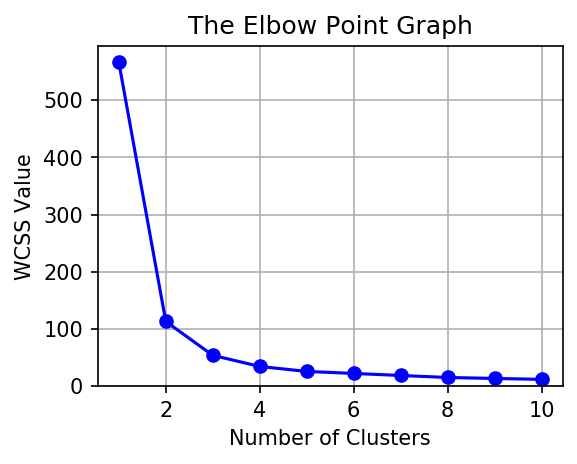

In [6]:
# Plot the Elbow Graph
plt.figure(figsize=(4, 3), dpi=150)
plt.plot(range(1, 11), wcss, 'bo-')

plt.grid()
plt.ylim(0)

plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")

plt.show()

**Observe** that after **3** clusters the drop in the WCSS value is minimal. So we choose **3** as the *optimal number of clusters*.

**Tip:** Normally when analysing such graphs, we try to look for the value at the *center at the curve/bend* of the Elbow Point Graph

# Initialising K-Means with Optimum Number of Clusters

In [7]:
# Fitting the K-Means to the dataset
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)

# Return a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


# Visualising the Clusters

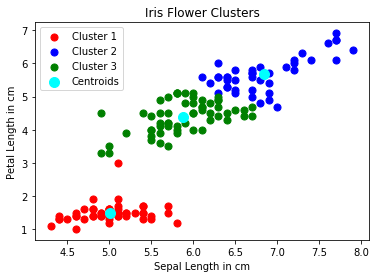

In [8]:
# We shall create a scatter plot (x, y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y==0, 0], X[y==0, 1], s=50, c='red', label='Cluster 1')
# We shall create a scatter plot (x, y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y==1, 0], X[y==1, 1], s=50, c='blue', label='Cluster 2')
# We shall create a scatter plot (x, y) with label 3 as Cluster 3 in color c = green and points in size s = 50
plt.scatter(X[y==2, 0], X[y==2, 1], s=50, c='green', label='Cluster 3')

# Scatter plotting the centroids with label='Centroids' in color c=cyan and points in size s=100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

## What does X[y==0, 0] and X[y==0, 1] do ?

In [9]:
X[y==0, 0], X[y==0, 1]

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 5.1]),
 array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 3. ]))

## What does X[y==1, 0] and X[y==1, 1] do ?

In [10]:
X[y==1, 0], X[y==1, 1]

(array([7. , 6.9, 6.8, 6.7, 6.3, 7.1, 6.3, 6.5, 7.6, 7.3, 6.7, 7.2, 6.5,
        6.4, 6.8, 6.4, 6.5, 7.7, 7.7, 6.9, 7.7, 6.7, 7.2, 6.4, 7.2, 7.4,
        7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.9, 6.7, 6.9, 6.8, 6.7, 6.7,
        6.5, 6.2]),
 array([4.7, 4.9, 4.8, 5. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 5.8, 6.1, 5.1,
        5.3, 5.5, 5.3, 5.5, 6.7, 6.9, 5.7, 6.7, 5.7, 6. , 5.6, 5.8, 6.1,
        6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 5.4, 5.6, 5.1, 5.9, 5.7, 5.2,
        5.2, 5.4]))

## What does X[y==2, 0] and X[y==2, 1] do ?

In [11]:
X[y==2, 0], X[y==2, 1]

(array([6.4, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6. , 5.7,
        5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8,
        5. , 5.6, 5.7, 5.7, 6.2, 5.7, 5.8, 4.9, 5.7, 5.8, 6. , 5.6, 6.3,
        6.2, 6.1, 6. , 5.8, 6.3, 5.9]),
 array([4.5, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
        4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.5, 3.5,
        3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4, 4.6, 4. ,
        3.3, 4.2, 4.2, 4.2, 4.3, 4.1, 5.1, 4.5, 5. , 5.1, 5. , 4.9, 4.9,
        4.8, 4.9, 4.8, 5.1, 5. , 5.1]))

---